# Wrangling and Analyzing WeRateDogs Twitter Dataset

# 1. Gathering Data

- Importing relevant modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import requests
import tweepy
import json
from decouple import config

%matplotlib inline

### 1.1. WeRateDogs Twitter archive

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### 1.2. The tweet image predictions
- Downloading a file containing image predictions after running every image in the twitter archive through a neural newtwork that can classify breeds of dogs

In [3]:
# request code
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.status_code

200

In [4]:
# split from the right side
file_name = url.rsplit('/', 1)[-1]

# download the file if it does not exist
if not os.path.isfile(file_name):
    with open(file_name, mode='wb') as file:
        file.write(response.content)

In [5]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### 1.3. Querying Twitter Data
- Using the tweet IDs to store each tweets entire set of JSON data in tweet_json.txt file
- Each tweets JSON data should be written to it's own line

In [6]:
api_key = config('API_KEY')
api_key_secret = config('API_KEY_SECRET')
bearer_token = config('BEARER_TOKEN')
access_token = config('ACCESS_TOKEN')
access_token_secret = config('ACCESS_TOKEN_SECRET')

In [7]:
auth = tweepy.OAuth1UserHandler(
    consumer_key=api_key, consumer_secret=api_key_secret, access_token=access_token, access_token_secret=access_token_secret
)
api = tweepy.API(auth)

In [8]:
tweet_ids = []
for id in twitter_archive.tweet_id:
    tweet_ids.append(id)
len(tweet_ids)

2356

### Writing and Reading Twitter JSON
- Passing the `%%capture` magic command that captures all outputs from a cell

In [12]:
%%capture

with open('tweet_json.txt', 'w') as outfile:
    for id in tweet_ids:
        try:
            ranking = tweet_ids.index(id) + 1
            # printing out each id after querying
            print(ranking)
            tweet = api.get_status(id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            # except Exception as e:
            print(str(ranking) + "_" + str(id) + ": " + str(e))
            continue

- Reading the `.txt` file into a pandas dataframe

In [9]:
api_data =[]

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        likes = tweet['favorite_count']
        tweet_text = tweet['full_text']
        api_data.append({
            'tweet_id': tweet_id,
            'retweet_count': retweet_count,
            'likes': likes,
        })

- Length of the gathered data

In [10]:
# len(api_data)
list.__len__(api_data)

2327

- Loading the data into a pandas dataframe.

In [11]:
tweet_df = pd.DataFrame(api_data)
tweet_df.head(3)

,tweet_id,retweet_count,likes
0,892420643555336193,7009,33803
1,892177421306343426,5302,29324
2,891815181378084864,3482,22058


# 2. Assess
## 2.1 Assess tweet_archive
### 2.1.1 Virtual Assessment

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Data Quality using visual assesment

1. __name__
- From the three columns above, its noticeable that some dogs have been named "a"
- There maybe some other invalid names like "a" in the `name` column, we therefore need a thorough look into it

### 2.1.2 Programatic Assessment

- Non directed programatic assessment

In [13]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
558,803321560782307329,NaN,NaN,2016-11-28 19:35:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Philbert. His toilet br...,7.677549e+17,4.196984e+09,2016-08-22 16:06:54 +0000,https://twitter.com/dog_rates/status/767754930...,11,10,Philbert,None,None,None,None
569,801958328846974976,NaN,NaN,2016-11-25 01:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ronnie. He hopes you're having a great...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801958328...,12,10,Ronnie,None,None,None,None
1792,677334615166730240,NaN,NaN,2015-12-17 03:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog gave up mid jump. 9/10 https://t.co/K...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677334615...,9,10,None,None,None,None,None
1197,717009362452090881,NaN,NaN,2016-04-04 15:22:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Smokey. He's having some sort of exist...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717009362...,10,10,Smokey,None,None,pupper,None
1546,689283819090870273,NaN,NaN,2016-01-19 03:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chipson. He's aerodynamic af. No ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689283819...,9,10,Chipson,None,None,None,None


In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Data Quality using programmatic assesment
__1. retweets and replies__
- The dataset is about rating of dog images and we only want original ratings(no retweets) that have images.
- We have to delete the retweets and replies from the dataset (delete the rows first because they have data that relates to the column)
- If we only drop the columns we will be left with data that has a relation with the removed column
- When all replies and retweets are removed the corresponding columns will contain `np.nan` values and it will be unnecessary to keep them

__2. timestamp__
- Timestamp should be a datetimesatmp data type

In [17]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

<AxesSubplot:>

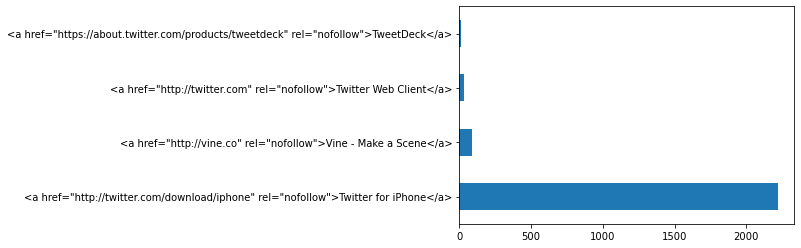

In [18]:
twitter_archive['source'].value_counts().plot(kind='barh')

__3. redundant text in source__
- `source` column contains some redundant text. The html syntax in the text should be removed, we need to extract the source

- Code to extend the text limit in output

In [19]:
pd.set_option('display.max_colwidth', 300)

In [20]:
twitter_archive['text'].sample(20)

1733                                                                                            This is Rinna. She's melting. 10/10 get inside pupper https://t.co/PA0czwucsb
366                              RT @dog_rates: This is Gus. He likes to be close to you, which is good because you want to be close to Gus. 12/10 would boop then pet https…
209         Meet General. He wasn't content with the quality of his room. Requested to pupgrade, but was ignored. 14/10 look who just lost a customer https://t.co/NP5JW8LnmW
106          Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w
125                                            Here's a h*ckin peaceful boy. Unbothered by the comings and goings. 13/10 please reveal your wise ways https://t.co/yeaH8Ej5eM
1521                                                           This is Cedrick. He's a spookster. Did me a discomfort. 10/10 would


- From the text we are able to tell whether the items are dogs or not dogs

In [21]:
twitter_archive[twitter_archive['text'].str.match('.*only rate dogs')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448815771648/photo/1,12,10,None,None,None,None,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562936811520/photo/1,12,10,None,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Unbelievable. We only rate dogs. Please don't send in non-canines like the ""I"" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495410671616/photo/1,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,679530280114372609,NaN,NaN,2015-12-23 05:13:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679530280114372609/photo/1,7,10,a,None,None,None,None
1745,679148763231985668,NaN,NaN,2015-12-22 03:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I know everyone's excited for Christmas but that doesn't mean you can send in reindeer. We only rate dogs... 8/10 https://t.co/eWjWgbOCYL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679148763231985668/photo/1,8,10,None,None,None,None,None
1854,675534494439489536,NaN,NaN,2015-12-12 04:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675534494439489536/photo/1,11,10,a,None,None,None,None
1877,675109292475830276,NaN,NaN,2015-12-11 00:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675109292475830276/photo/1,9,10,a,None,None,None,None


In [22]:
twitter_archive[twitter_archive['text'].str.match('.*only rate dogs')].index

Int64Index([  25,   59,   93,  118,  127,  131,  141,  154,  169,  193,  221,
             226,  246,  314,  386,  390,  411,  416,  419,  494,  506,  521,
             538,  542,  732,  744,  759,  773,  801,  819,  841,  869,  887,
             890, 1017, 1031, 1071, 1077, 1085, 1090, 1097, 1102, 1121, 1150,
            1193, 1207, 1225, 1234, 1290, 1356, 1362, 1385, 1435, 1527, 1564,
            1610, 1693, 1699, 1726, 1737, 1745, 1854, 1877, 1938],
           dtype='int64')

__4. only_rate dogs__
- `text` column contains some text that is not dogs. We need to remove these rows

__5. some ratings were not properly recorded__

- Printing a concise summary of the data frame

In [23]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- There seems to be a problrm with the `max` and `min` score of the `rating_numerator` and `rating_denominator`.
- Use regular expression to extract the numerator

__6. rating denominator column is not necessary__
- All scores in the `rating_denominator` are known to be 10 so its not necessary to keep it
- Get rid of the rating_denominator and rename the rating_numerator to rating
- Change the data type to float

In [24]:
twitter_archive.duplicated().sum()

0

- The dataset has no duplicates

### Data Tidiness using programmatic assesment
__1. doggo, floofer, pupper, puppo should be in one column__
- They should be grouped under a `dog_stage` column

In [25]:
twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

## 2.2 Assess image_predictions
### 2.2.1 Virtual Assessment

In [26]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### 2.2.2 Programatic Assessment

In [27]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [29]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1143,730196704625098752,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,1,hand_blower,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False
1751,824297048279236611,https://pbs.twimg.com/media/C3B9ypNWEAM1bVs.jpg,2,teddy,0.588230,False,jigsaw_puzzle,0.028910,False,doormat,0.022251,False
557,677687604918272002,https://pbs.twimg.com/media/CWehRdEWIAAySyO.jpg,1,Pembroke,0.573047,True,sunglasses,0.126758,False,golden_retriever,0.108047,True
1669,813066809284972545,https://pbs.twimg.com/media/C0iX8OOVEAEIpMC.jpg,1,toy_terrier,0.776400,True,Pembroke,0.115034,True,basenji,0.048873,True
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,wool,0.525434,False,fur_coat,0.236391,False,kuvasz,0.038243,True


In [30]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Data Tidiness using programmatic assesment
__1. create a breed and confidence column__
- Reduce the columns (from index 3 to 11) into two

In [32]:
image_predictions.duplicated().sum()

0

- printing the datasets concise summary

In [31]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## 2.3 Assess api_data
### 2.3.1 Virtual Assessment

In [35]:
tweet_df

,tweet_id,retweet_count,likes
0,892420643555336193,7009,33803
1,892177421306343426,5302,29324
2,891815181378084864,3482,22058
3,891689557279858688,7220,36915
4,891327558926688256,7764,35278
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


### 2.3.2 Programmatic Assessment

In [37]:
tweet_df.head()

,tweet_id,retweet_count,likes
0,892420643555336193,7009,33803
1,892177421306343426,5302,29324
2,891815181378084864,3482,22058
3,891689557279858688,7220,36915
4,891327558926688256,7764,35278


In [38]:
tweet_df.tail()

,tweet_id,retweet_count,likes
2322,666049248165822465,37,89
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112
2326,666020888022790149,423,2291


In [39]:
tweet_df.sample(5)

,tweet_id,retweet_count,likes
1119,726935089318363137,2213,6313
319,832645525019123713,485,2744
1966,672594978741354496,531,1181
501,810254108431155201,3168,13977
1025,742465774154047488,3611,6760


In [36]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2327 non-null   int64
 1   retweet_count  2327 non-null   int64
 2   likes          2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [40]:
tweet_df.describe()

,tweet_id,retweet_count,likes
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2472.082510,7052.606790
std,6.820795e+16,4186.297259,10957.789433
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,495.000000,1226.500000
50%,7.178418e+17,1149.000000,3052.000000
75%,7.986547e+17,2862.500000,8602.500000
max,8.924206e+17,70775.000000,144846.000000


- Some maximum values seem weird.
- Discover the correlation between `retweet_count` and `likes`

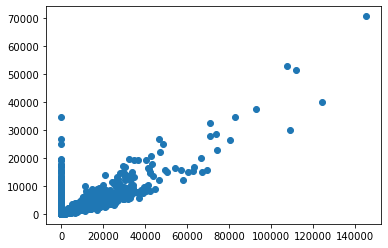

In [43]:
plt.scatter(data=tweet_df, x='likes', y='retweet_count');

- The indication is that there is a high correlation between likes and retweets.
- Surprisingly, there are data points which have `0` likes and a high number of retweets

In [48]:
tweet_df.query('retweet_count == 0')

,tweet_id,retweet_count,likes


In [46]:
tweet_df.query('likes == 0')

,tweet_id,retweet_count,likes
31,886054160059072513,93,0
35,885311592912609280,15442,0
67,879130579576475649,5743,0
72,878404777348136964,1076,0
73,878316110768087041,5531,0
...,...,...,...
995,746521445350707200,901,0
1015,743835915802583040,1874,0
1214,711998809858043904,122,0
2230,667550904950915073,29,0


- These data points should be cleaned, they may be a result of outliers

# Assesment Summary
## Quality
#### twitter_archive
1. _invalid names ("his", "a" - start with lowercase )_
2. _dataset contains retweets and replies (research focuses on original tweets)_
3. _Erroneous data types (timestamp, rating)_
4. _redundant text in source (html tags)_
5. _only rate dogs(some rows contain non dog ratings)_
6. _ratings were not properly extracted_
7. _rating_denominator, expanded_url not necessary_
#### api_data
8. _outliers (unreasonable for a tweet to have 0 likes and high retweets)_

## Tidiness
1. `twitter_archive`: _doggo, fluffer should be in a dog_stage column_
2. `image_predictions`: _breed and confidence column_
3. _`twitter_archive` and `api_data` should not be separated (they are one observational unit)_

# 3. Clean

- Making a copy of each dataset

## 3.1 twitter_archive

In [90]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
api_data = api_data.copy()

### 1. `twitter_archive`: doggo, fluuffer, pupper, puppo a `dog_stage` column
##### Define
- Change the 1976 "None" values to "NaN" to be able to take them out
- Turn the four dog stages to one column ()
- Drop the doggo, floofer, pupper and puppo columns

##### Code

In [92]:
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

In [93]:
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

In [94]:
twitter_archive_clean[dog_stages] = twitter_archive_clean[dog_stages].replace('None', np.nan)

In [95]:
def join(x):
    """
    Merging four columns into a single column

    Returns:
        drop nulls, convert to str then join with comma
    Example:
        ['None', 'floofer', 'Noner', 'puppo'] -> [NaN,'floofer', Nan, 'puppo'] -> [, 'floofer', , 'puppo']-> [' ,floofer, ,puppo']

    """
    return ', '.join(x.dropna().astype(str))

twitter_archive_clean['dog_stages'] = twitter_archive_clean[dog_stages].apply(join, axis=1)

# dropping spaces that exist in the column with nan
twitter_archive_clean['dog_stages'] = twitter_archive_clean['dog_stages'].replace('', np.nan)

##### Test

In [106]:
twitter_archive_clean['dog_stages'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

## 3.2 image_predictions

In [107]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [108]:
image_predictions_clean[['p1_dog', 'p2_dog', 'p3_dog']].value_counts()

p1_dog  p2_dog  p3_dog
True    True    True      1243
False   False   False      324
True    True    False      155
False   True    True       101
True    False   True        91
False   False   True        64
        True    False       54
True    False   False       43
dtype: int64

- They are boolean values but ideally one should look at them separately
- First of all we create a criteria where the p1, p2 and p3 dogs are true (take the dog predictions only)
- We can now use this criteria anywhere now (only picking the columns where there are true)

In [109]:
criteria = [(image_predictions_clean['p1_dog'] == True),(image_predictions_clean['p2_dog'] == True), (image_predictions_clean['p3_dog'] == True)]

- create the same thing for breed
- Because they are not boolean values we do not need to equate them to true

In [110]:
image_predictions_clean['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [111]:
image_predictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [112]:
breed = [(image_predictions_clean['p1']),(image_predictions_clean['p2']), (image_predictions_clean['p3'])]

- Finally do the same thing for conf

In [113]:
conf = [(image_predictions_clean['p1_conf']),(image_predictions_clean['p2_conf']), (image_predictions_clean['p3_conf'])]

- create two columns(breed and confidence) and select based on criteria
- Use the select function from numpy (condition list will be criteria and the two will be choice list, default)
- If we are dealing with objects the default can be ignored(equate to None), if dealing with numbers the condition should be defaulted to zero

In [114]:
image_predictions_clean['breed'] = np.select(criteria, breed, default='none')
image_predictions_clean['confidence'] = np.select(criteria, conf, default=0)

In [115]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   p1          2075 non-null   object 
 4   p1_conf     2075 non-null   float64
 5   p1_dog      2075 non-null   bool   
 6   p2          2075 non-null   object 
 7   p2_conf     2075 non-null   float64
 8   p2_dog      2075 non-null   bool   
 9   p3          2075 non-null   object 
 10  p3_conf     2075 non-null   float64
 11  p3_dog      2075 non-null   bool   
 12  breed       2075 non-null   object 
 13  confidence  2075 non-null   float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


- We have breed and confidence so the next thing is to delete the `_conf` columns
- Delete from 3 to 11
- Once you have cleaned you need to merge

# Store

# Analysis and Visualization

- Source (What phone did twitters tweet from mostly)